In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import sys
import os
sys.path.append(os.path.abspath('../'))
from src import soporte_ajuste as sa

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
pd.options.display.float_format = "{:,.2f}".format
import tqdm

In [27]:
df = pd.read_csv('../datos/datos_finales.csv', index_col=0)

In [28]:
df.head()

,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,postalCode,price_knn,monthOfRegistration_knn,powerCV_estandar,kilometer_estandar,yearOfRegistration_estandar
seller,,,,,,,,,,,,,,,
"10,748.82","10,748.98","10,945.03","11,887.61","7,958.34","19,446.02","8,752.10","14,492.68","20,923.16","6,001.76",49751,"2,990.00",6.00,-0.05,0.61,-0.02
"10,748.82","10,748.98","10,945.03","24,193.78","7,958.34","21,975.46","10,401.32","12,749.69","6,497.91","6,001.76",66954,"18,300.00",5.00,0.39,-0.02,0.07
"10,748.82","10,748.98","10,945.03","13,029.36","13,104.24","9,911.47","10,401.32","11,877.45","20,923.16","23,790.87",90480,"9,800.00",8.00,0.25,-0.02,-0.01
"10,748.82","10,748.98","10,945.03","5,719.64","7,958.34","19,446.02","8,752.10","14,492.68","8,549.04","5,708.61",91074,"1,500.00",6.00,-0.21,0.61,-0.04
"10,748.82","10,748.98","10,945.03","5,719.64","7,958.34","4,134.67","10,401.32","6,317.43","8,549.04","8,806.46",60437,"3,600.00",7.00,-0.24,-0.89,0.04


In [29]:
x = df.drop('price_knn',axis=1)                #primer paso dividir variable respuesta, y variables predictoras 
                                                #x e y, y siempre es la variable respuesta.
y = df[['price_knn']]

In [5]:
#definimos el train y el Test
x_train, x_test , y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [30]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_test_pred = regr.predict(x_test)
y_test_pred[:3]

array([[ 5186.91207259],
       [ -852.20467674],
       [22134.78570203]])

In [31]:
y_train_pred = regr.predict(x_train)
y_train_pred


array([[ 4449.82976394],
       [24856.32324769],
       [21758.83854581],
       ...,
       [13096.39298241],
       [-6019.66935589],
       [ 5128.57443264]])

In [32]:
metricas = {'train': {
                    'r2_score': r2_score(y_train, y_train_pred),
                    'MAE': mean_absolute_error(y_train, y_train_pred),
                    'MSE': mean_squared_error(y_train, y_train_pred),
                    'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
                },
                'test': {
                    'r2_score': r2_score(y_test, y_test_pred),
                    'MAE': mean_absolute_error(y_test, y_test_pred),
                    'MSE': mean_squared_error(y_test, y_test_pred),
                    'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))}}

df_metricas= pd.DataFrame(metricas)
df_metricas 

,train,test
r2_score,0.00,-0.04
MAE,"21,582.08","15,549.84"
MSE,"587,696,556,818.10","8,371,316,753.43"
RMSE,"766,613.69","91,494.90"


**kfold**

In [33]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train)
y_pred_test = modelo_lineal.predict(x_test)
y_pred_train = modelo_lineal.predict(x_train)

In [36]:
kf_2 = KFold(n_splits=5, 
           shuffle=True, 
           random_state=42)

score_rmse2 = cross_val_score(modelo_lineal, 
                           x, 
                          y , 
                           cv = kf_2, 
                            scoring="neg_root_mean_squared_error" )
abs(np.mean(score_rmse2))

np.float64(529942.6281798225)

In [ ]:
# loo = LeaveOneOut()
# scores = []

# for indice in tqdm(range(df.shape[0])):
#     X_test_cv = x.iloc[[indice]]
#     X_train_cv = x.drop(index = indice )

#     y_test_cv = y.iloc[indice,:]
#     y_train_cv = y.drop(index = indice)

#     modelo_lineal.fit(X_train_cv, y_train_cv)
#     y_pred = modelo_lineal.predict(X_test_cv)

#     rmse = np.sqrt(mean_squared_error(y_test_cv, y_pred))

#     scores.append(rmse)                                               #peta el pc

# np.mean(scores)

In [45]:
pd.options.display.float_format = "{:,.2f}".format
df_coef = pd.DataFrame(modelo_lineal.coef_, columns= x.columns).T
df_coef.sort_values(by = 0, key = abs, ascending=False)

,0
kilometer_estandar,"-5,392.17"
yearOfRegistration_estandar,"-1,143.26"
monthOfRegistration_knn,-492.22
powerCV_estandar,477.01
offerType,11.04
dateCreated,1.46
notRepairedDamage,1.01
model,0.92
gearbox,0.84
brand,0.66


In [9]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='price_knn')

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='regresion')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.head()

,Real,Predicho,Conjunto,Modelo,Residuos
seller,,,,,
"10,748.82","1,500.00","4,657.19",Train,regresion,"-3,157.19"
"10,748.82","3,000.00","62,963.40",Train,regresion,"-59,963.40"
"10,748.82","3,125.00","-4,937.66",Train,regresion,"8,062.66"
"10,748.82",0.00,"134,017.85",Train,regresion,"-134,017.85"
"10,748.82","2,150.00","5,604.54",Train,regresion,"-3,454.54"


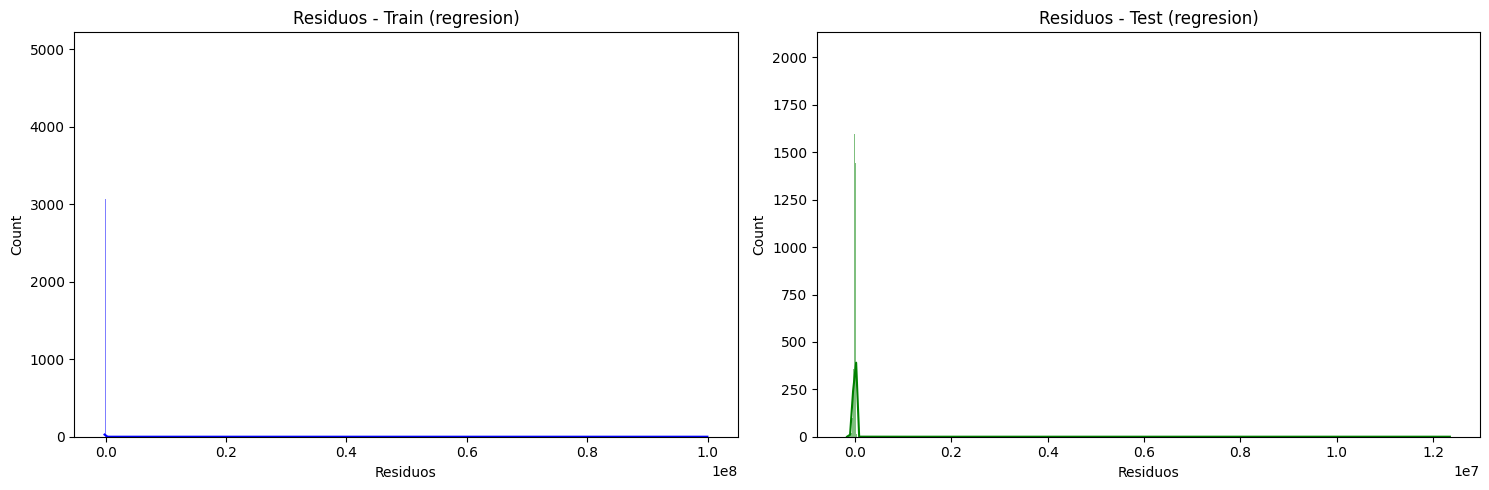

In [10]:
# llamamos a la función para ver los residuos
analisis.plot_residuos("regresion")

In [11]:
# llamamos al método para calcular las métricas del modelo
analisis.calcular_metricas("regresion")

,train,test
R2,0.00,-0.04
MAE,"19,282.74","13,899.15"
MSE,"515,470,493,013.17","7,503,759,896.28"
RMSE,"717,962.74","86,624.25"


In [12]:
analisis.ajustar_modelo('tree')

In [13]:
# llamamos al método para calcular las métricas del modelo
analisis.calcular_metricas("tree")

,train,test
R2,1.00,-168.29
MAE,1.71,"15,317.56"
MSE,"19,104.93","1,224,992,221,383.34"
RMSE,138.22,"1,106,793.67"


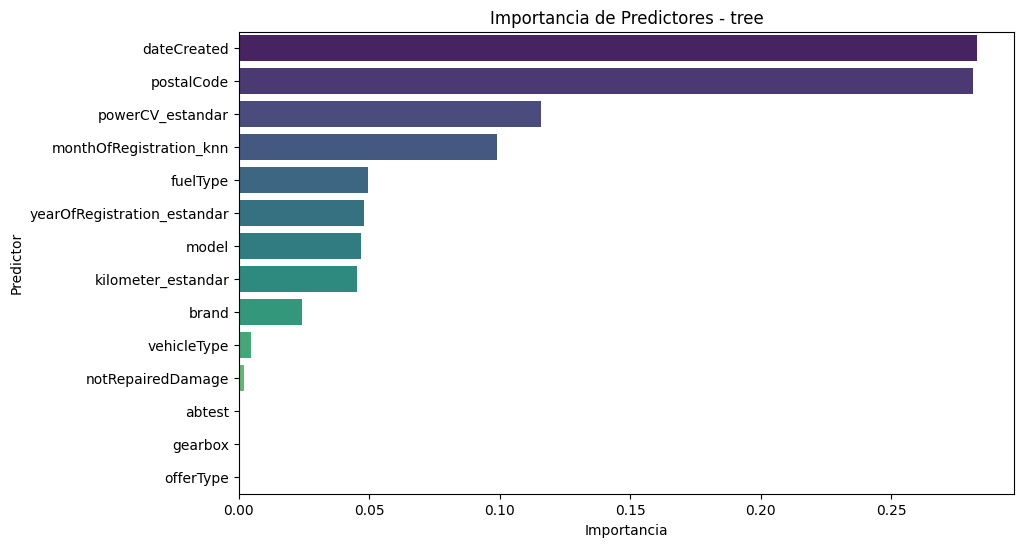

,Predictor,Importancia
8,dateCreated,0.28
9,postalCode,0.28
11,powerCV_estandar,0.12
10,monthOfRegistration_knn,0.10
5,fuelType,0.05
13,yearOfRegistration_estandar,0.05
4,model,0.05
12,kilometer_estandar,0.05
6,brand,0.02
2,vehicleType,0.00


In [14]:
analisis.importancia_predictores('tree')

In [15]:
analisis.ajustar_modelo('random_forest')

In [16]:
analisis.calcular_metricas("random_forest")

,train,test
R2,0.84,-16.54
MAE,"5,804.11","13,027.75"
MSE,"84,348,202,071.37","126,940,243,258.52"
RMSE,"290,427.62","356,286.74"


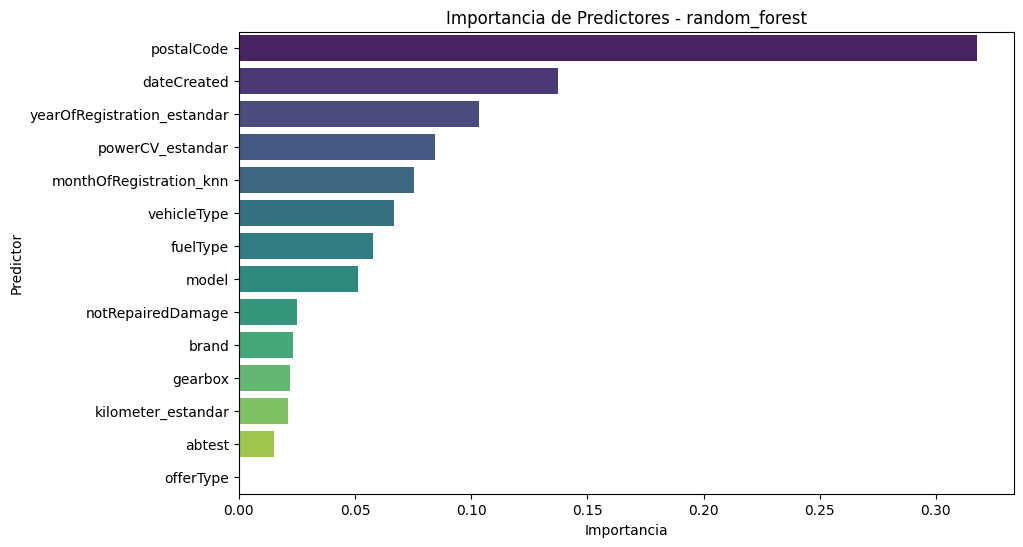

,Predictor,Importancia
9,postalCode,0.32
8,dateCreated,0.14
13,yearOfRegistration_estandar,0.10
11,powerCV_estandar,0.08
10,monthOfRegistration_knn,0.08
2,vehicleType,0.07
5,fuelType,0.06
4,model,0.05
7,notRepairedDamage,0.02
6,brand,0.02


In [17]:
analisis.importancia_predictores('random_forest')

In [18]:
analisis.ajustar_modelo('gradient_boosting')

In [19]:
analisis.calcular_metricas("gradient_boosting")

,train,test
R2,0.22,-7.93
MAE,"15,646.08","13,186.19"
MSE,"402,573,508,029.58","64,630,266,328.84"
RMSE,"634,486.81","254,224.83"


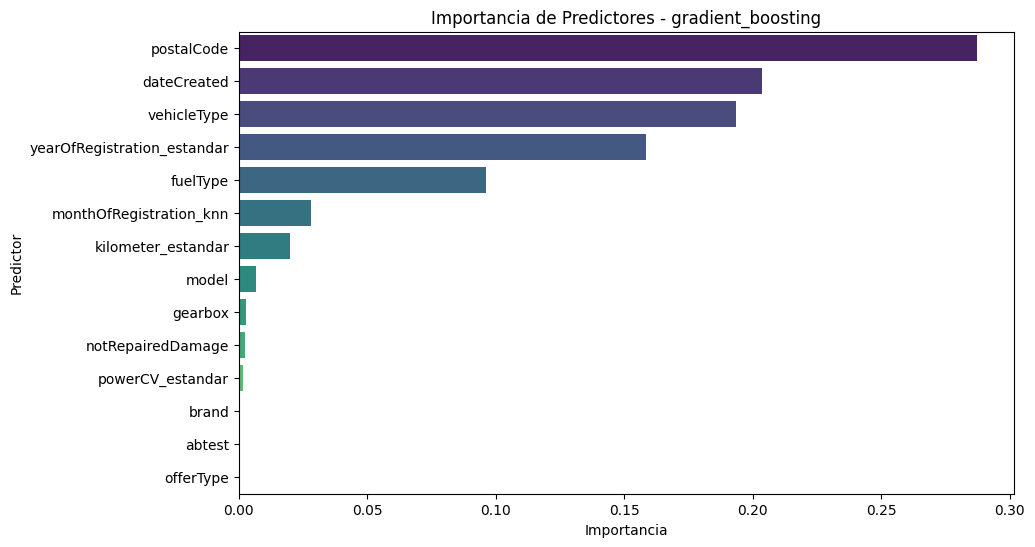

,Predictor,Importancia
9,postalCode,0.29
8,dateCreated,0.20
2,vehicleType,0.19
13,yearOfRegistration_estandar,0.16
5,fuelType,0.10
10,monthOfRegistration_knn,0.03
12,kilometer_estandar,0.02
4,model,0.01
3,gearbox,0.00
7,notRepairedDamage,0.00


In [20]:
analisis.importancia_predictores('gradient_boosting')

In [21]:
analisis.ajustar_modelo('xgboost')

In [22]:
analisis.calcular_metricas("xgboost")

,train,test
R2,0.93,-40.67
MAE,"14,012.36","23,482.15"
MSE,"36,969,792,386.45","301,525,718,169.74"
RMSE,"192,275.30","549,113.57"


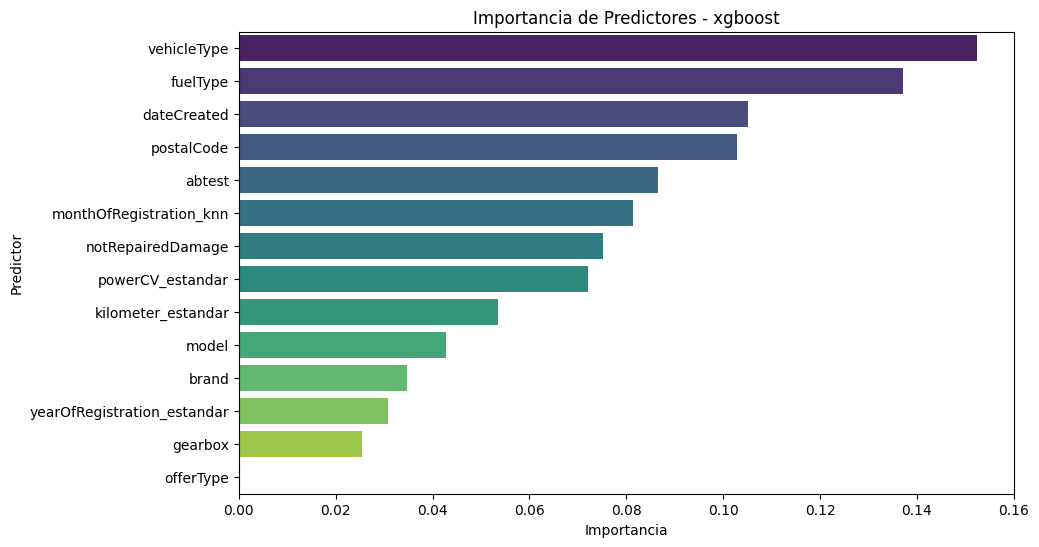

,Predictor,Importancia
2,vehicleType,0.15
5,fuelType,0.14
8,dateCreated,0.11
9,postalCode,0.10
1,abtest,0.09
10,monthOfRegistration_knn,0.08
7,notRepairedDamage,0.08
11,powerCV_estandar,0.07
12,kilometer_estandar,0.05
4,model,0.04


In [23]:
analisis.importancia_predictores('xgboost')